In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS

In [3]:
df=pd.read_csv("salary_data_cleaned.csv")
df.head()

,Unnamed: 0,company,job title,location,job description,salary estimate,company_size,company_type,company_sector,company_industry,...,rating,python_yn,spark_yn,azure_yn,aws_yn,excel_yn,machine_learning_yn,job_simpl,seniority,description_len
0,0,Microsoft,Data & Applied Scientist,"Redmond, WA",Microsoft 365 is a key part of the company’s c...,123486.0,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,4.4,1,0,0,1,0,1,data scientist,junior,359
1,1,UT Southwestern Medical Center,Data Scientist or Bioinformatician (remote),Remote,Center Information:\nThe Quantitative Biomedic...,93500.0,10000+ Employees,Hospital,Healthcare,Health Care Services & Hospitals,...,4.0,1,0,0,0,0,1,data scientist,mid,267
2,2,Notion,"Data Scientist, Growth","New York, NY",About Us:\nWe're on a mission to make it possi...,137853.0,201 to 500 Employees,Company - Private,Information Technology,Enterprise Software & Network Solutions,...,4.9,1,0,0,0,0,0,data scientist,Senior,589
3,3,Net2Aspire,Jr. Data Scientist,Remote, Apply Statistical and Machine Learning metho...,72500.0,Unknown,Company - Public,NaN,NaN,...,no rating,0,0,0,0,0,1,data scientist,junior,132
4,4,Ntropy Network,Data Scientist,Remote,"Over the last few decades, technological innov...",155000.0,1 to 50 Employees,Company - Private,NaN,NaN,...,no rating,1,0,0,1,0,0,data scientist,mid,522


In [4]:
df['rating']=df['rating'].apply(lambda x: np.nan if x=='no rating' else float(x))
df['rating']

0       4.4
1       4.0
2       4.9
3       NaN
4       NaN
       ... 
2079    4.3
2080    4.4
2081    4.2
2082    4.5
2083    4.8
Name: rating, Length: 2084, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2084 non-null   int64  
 1   company              2084 non-null   object 
 2   job title            2084 non-null   object 
 3   location             2084 non-null   object 
 4   job description      2084 non-null   object 
 5   salary estimate      2084 non-null   float64
 6   company_size         1917 non-null   object 
 7   company_type         1917 non-null   object 
 8   company_sector       1568 non-null   object 
 9   company_industry     1568 non-null   object 
 10  company_founded      1383 non-null   float64
 11  company_revenue      1917 non-null   object 
 12  hourly               2084 non-null   int64  
 13  rating               1711 non-null   float64
 14  python_yn            2084 non-null   int64  
 15  spark_yn             2084 non-null   i

### convert the hourly salaries into annual salaries

- if a employee works full time so he works 40 hours per week which is approximately 2000 hour per year
- so we wll muiltiply the hourly salary by 2000

In [6]:
df["salary estimate"]=df.apply(lambda x : x['salary estimate']*2000 if x['hourly']==1 else x['salary estimate'],axis=1)

In [7]:
df[df['hourly']==1]['salary estimate']

13      130000.0
21      125000.0
27       65000.0
34       80700.0
40      130000.0
          ...   
2052     70600.0
2071    109880.0
2072    100000.0
2078    100000.0
2081     70600.0
Name: salary estimate, Length: 346, dtype: float64

In [8]:
df['company_age']=2022-df['company_founded']
df[['company','company_age']]

,company,company_age
0,Microsoft,47.0
1,UT Southwestern Medical Center,79.0
2,Notion,6.0
3,Net2Aspire,NaN
4,Ntropy Network,NaN
...,...,...
2079,YouTube,17.0
2080,Hunter Engineering,76.0
2081,precision technologies corp,14.0
2082,Argonne National Laboratory,76.0


In [9]:
df.describe()

,Unnamed: 0,salary estimate,company_founded,hourly,rating,python_yn,spark_yn,azure_yn,aws_yn,excel_yn,machine_learning_yn,description_len,company_age
count,2084.000000,2084.000000,1383.000000,2084.000000,1711.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,1383.000000
mean,1041.500000,108768.642994,1964.744035,0.166027,4.061368,0.712572,0.117083,0.137716,0.293186,0.367083,0.608445,409.041747,57.255965
std,601.743301,34434.634748,63.239520,0.372194,0.486386,0.452671,0.321596,0.344684,0.455332,0.482125,0.488215,222.222939,63.239520
min,0.000000,3760.000000,1625.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000
25%,520.750000,88384.500000,1943.000000,0.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.000000,14.000000
50%,1041.500000,107747.000000,1984.000000,0.000000,4.100000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,403.000000,38.000000
75%,1562.250000,126495.000000,2008.000000,0.000000,4.300000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,583.000000,79.000000
max,2083.000000,297000.000000,2021.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2781.000000,397.000000


<AxesSubplot:>

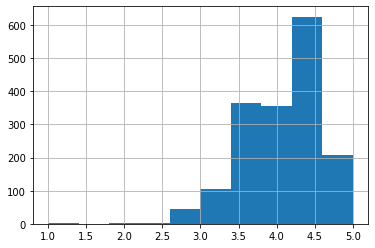

In [10]:
df['rating'].hist()

<AxesSubplot:>

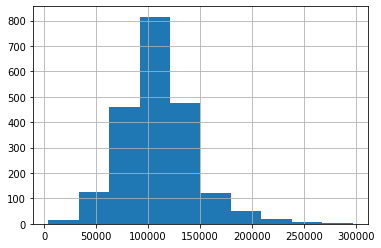

In [11]:
df['salary estimate'].hist()

<AxesSubplot:>

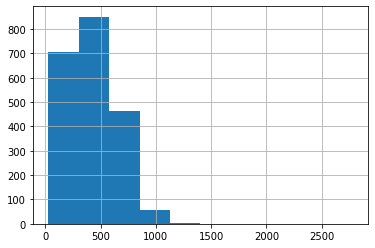

In [12]:
df['description_len'].hist()

<AxesSubplot:>

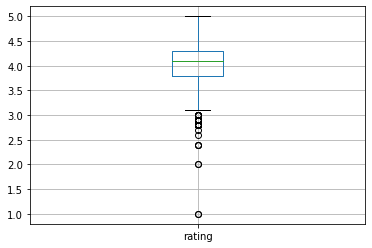

In [13]:
df.boxplot(column='rating')

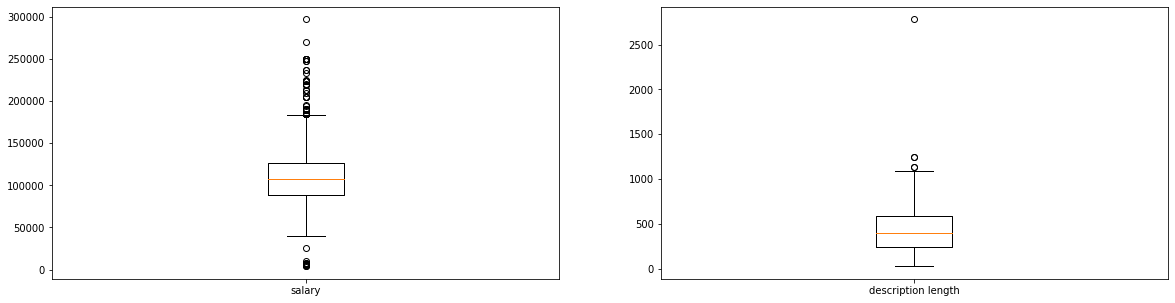

In [14]:
fig,ax=plt.subplots(1,2,figsize=(20,5))

ax[0].boxplot(data=df,x='salary estimate')
ax[0].set_xticklabels(['salary'])

ax[1].boxplot(data=df,x='description_len')
ax[1].set_xticklabels(['description length'])

plt.show()

In [15]:
corr=df[['salary estimate','rating','description_len','company_age']].corr()
corr

,salary estimate,rating,description_len,company_age
salary estimate,1.000000,0.061203,0.173257,-0.028913
rating,0.061203,1.000000,-0.018534,-0.042719
description_len,0.173257,-0.018534,1.000000,0.101432
company_age,-0.028913,-0.042719,0.101432,1.000000


<AxesSubplot:>

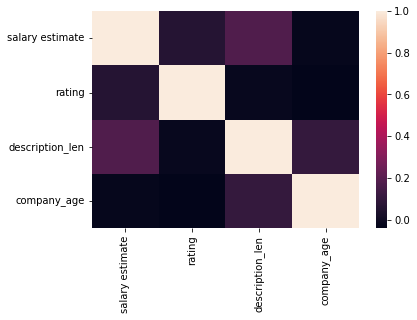

In [16]:
sns.heatmap(corr)

In [17]:

df.columns

Index(['Unnamed: 0', 'company', 'job title', 'location', 'job description',
       'salary estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue', 'hourly',
       'rating', 'python_yn', 'spark_yn', 'azure_yn', 'aws_yn', 'excel_yn',
       'machine_learning_yn', 'job_simpl', 'seniority', 'description_len',
       'company_age'],
      dtype='object')

In [18]:
df_cat=df[['job title', 'location','company_size', 'company_type', 'company_sector',
       'company_industry','company_revenue','python_yn', 'spark_yn', 'azure_yn', 'aws_yn', 'excel_yn',
       'machine_learning_yn', 'job_simpl', 'seniority']]

graph for job title


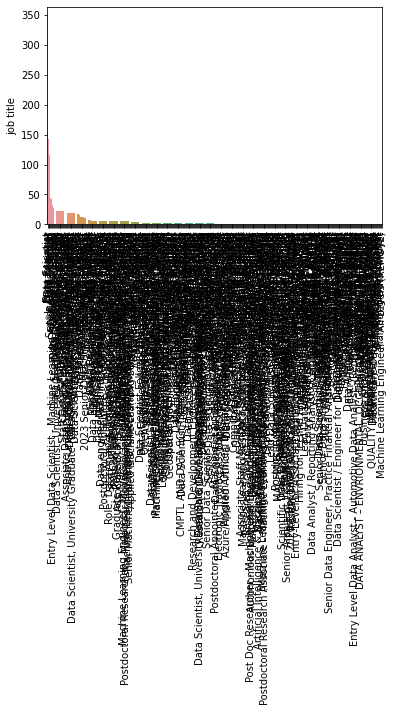

graph for location


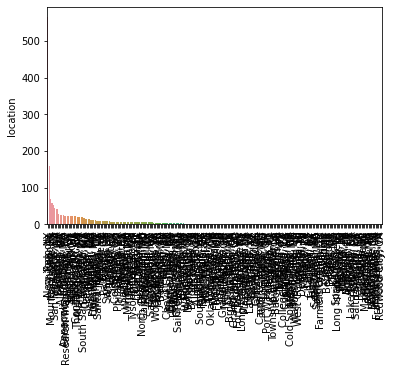

graph for company_size


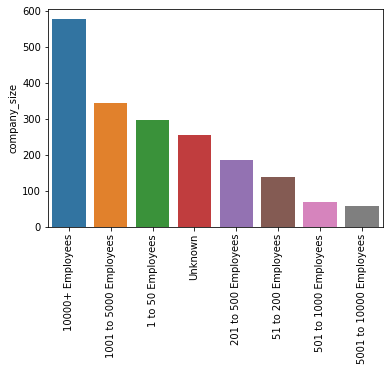

graph for company_type


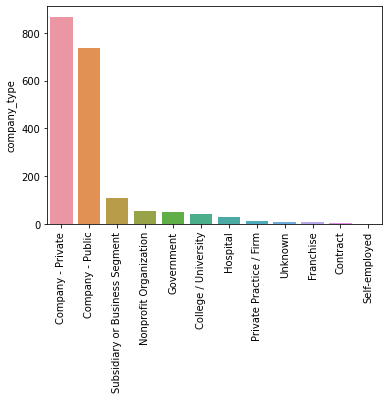

graph for company_sector


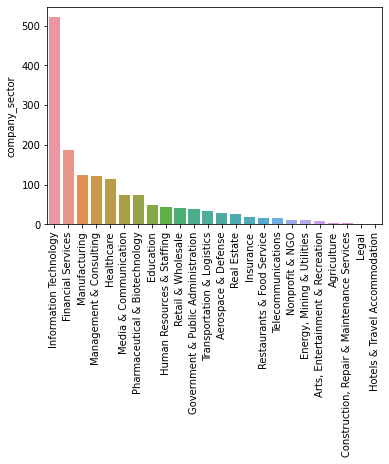

graph for company_industry


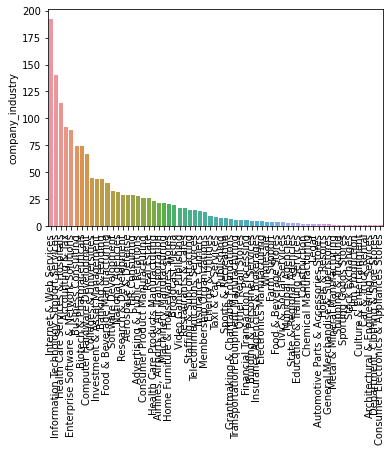

graph for company_revenue


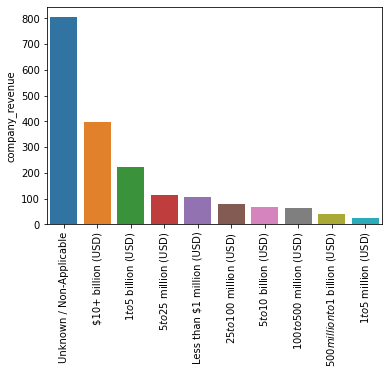

graph for python_yn


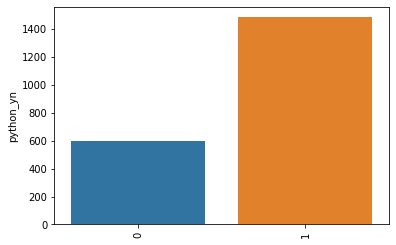

graph for spark_yn


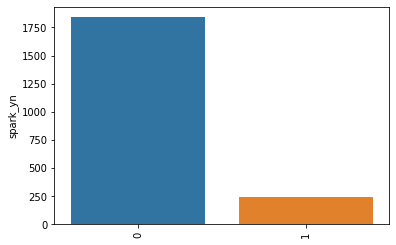

graph for azure_yn


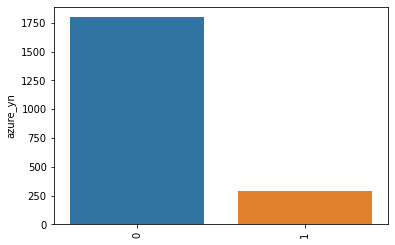

graph for aws_yn


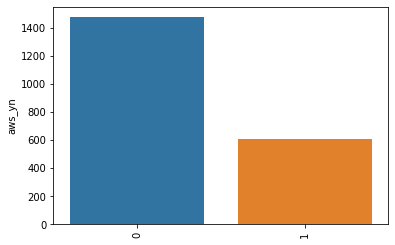

graph for excel_yn


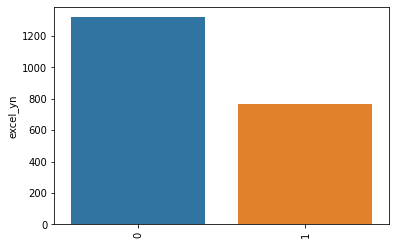

graph for machine_learning_yn


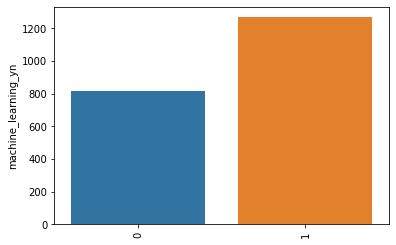

graph for job_simpl


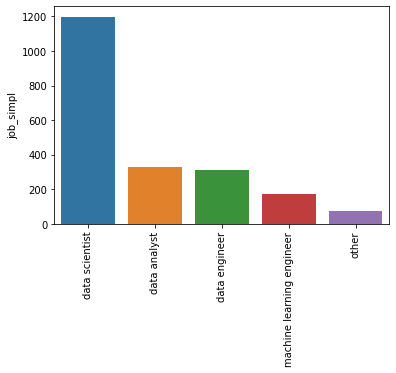

graph for seniority


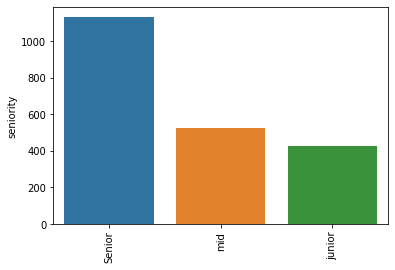

In [19]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("graph for",i)
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [20]:
df.columns

Index(['Unnamed: 0', 'company', 'job title', 'location', 'job description',
       'salary estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue', 'hourly',
       'rating', 'python_yn', 'spark_yn', 'azure_yn', 'aws_yn', 'excel_yn',
       'machine_learning_yn', 'job_simpl', 'seniority', 'description_len',
       'company_age'],
      dtype='object')

In [21]:
pd.pivot_table(df,values='salary estimate',index=['job_simpl','seniority'])

salary estimate
job_simpl                 seniority                 
data analyst              Senior        81425.726708
                          junior        77796.652632
                          mid           84819.111111
data engineer             Senior       128811.423841
                          junior        77077.314286
                          mid          111922.780488
data scientist            Senior       120021.778917
                          junior        91697.719149
                          mid          119234.132616
machine learning engineer Senior       123954.123894
                          junior       102175.954545
                          mid          109267.692308
other                     Senior       129135.500000
                          junior        66029.682927
                          mid           94469.181818

In [22]:
words=" ".join(df['job description'])

def preprocess(text):
    text=text.lower()
    text=re.sub(r"[^a-zA-Z0-9]"," ",text)
    text=text.split(" ")
    en_stops = set(stopwords.words('english'))
    for i in text:
      if i in en_stops:
        text.remove(i)
    
    return text 
filtered_words=preprocess(words)

In [23]:
filtered_words

['microsoft',
 '365',
 'key',
 'part',
 'company',
 'cloud',
 'strategy',
 'overall',
 'mission',
 'empowering',
 'people',
 'organizations',
 'achieve',
 '',
 'part',
 'customer',
 'journey',
 'cloud',
 'times',
 'need',
 'reach',
 'seek',
 'help',
 'microsoft',
 'team',
 'steps',
 'make',
 'sure',
 'customer',
 'support',
 'experience',
 'best',
 'class',
 '',
 'team',
 'responsible',
 'entire',
 'admin',
 'support',
 'ecosystem',
 'starting',
 'microsoft',
 'admin',
 'portal',
 '',
 'https',
 '',
 '',
 'admin',
 'microsoft',
 'com',
 '',
 '',
 'support',
 'entry',
 'point',
 'experience',
 '',
 'ai',
 'driven',
 'self',
 'help',
 '',
 'diagnostics',
 'making',
 'sure',
 'telemetry',
 'readily',
 'available',
 'engineering',
 'continuously',
 'drive',
 'product',
 'improvements',
 '',
 'team',
 'full',
 'people',
 'truly',
 'embraced',
 'growth',
 'mindset',
 '',
 'afraid',
 'make',
 'mistakes',
 '',
 'believes',
 'obsessed',
 'providing',
 'customers',
 'best',
 'support',
 'experie

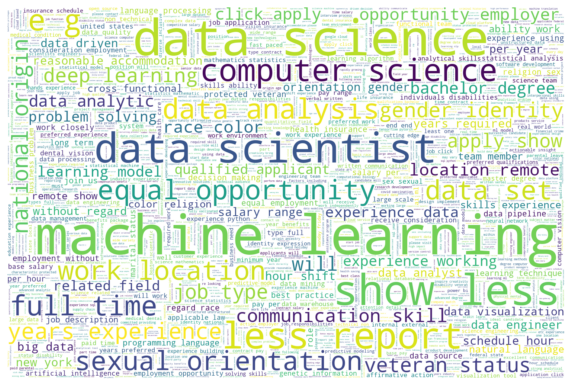

In [24]:
text=" ".join([ele for ele in filtered_words])
wc=WordCloud(background_color='white',random_state=1,stopwords=STOPWORDS,max_words=2000,width=1500,height=1000)
wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
df.to_csv("eda.csv")